Realizamos  las importaciones necesarias, vemos un poco los datos generales del dataset

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('sunspot_data.csv')
df = df.replace(
    to_replace={
                "Number of Sunspots":{
    -1: np.nan}
}) # Reemplaza los -1 por NaN en cierta columna
df = df.replace(-1, np.nan)   # Reemplaza los -1 por NaN
df.drop("Unnamed: 0", axis = 1, inplace = True)
print(df.describe())
print("nulo",df.isnull().sum().sum())
df = df.dropna()
df.head()

               Year         Month           Day  Date In Fraction Of Year  \
count  73718.000000  73718.000000  73718.000000              73718.000000   
mean    1918.416750      6.518896     15.729347               1918.916406   
std       58.264401      3.447114      8.800032                 58.264520   
min     1818.000000      1.000000      1.000000               1818.001000   
25%     1868.000000      4.000000      8.000000               1868.458500   
50%     1918.000000      7.000000     16.000000               1918.917500   
75%     1969.000000     10.000000     23.000000               1969.373250   
max     2019.000000     12.000000     31.000000               2019.832000   

       Number of Sunspots  Standard Deviation  Observations     Indicator  
count        70471.000000        70471.000000  73718.000000  73718.000000  
mean            82.946247            7.289718      4.429678      0.998331  
std             77.252109            4.567518      7.884112      0.040814  
mi

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
7,1818,1,8,1818.021,65.0,10.2,1,1
12,1818,1,13,1818.034,37.0,7.7,1,1
16,1818,1,17,1818.045,77.0,11.1,1,1
17,1818,1,18,1818.048,98.0,12.6,1,1
18,1818,1,19,1818.051,105.0,13.0,1,1


Procedemos a realizar diferentes visualizaciones de los datos para ver cuál es la mejor forma de filtrar los datos.

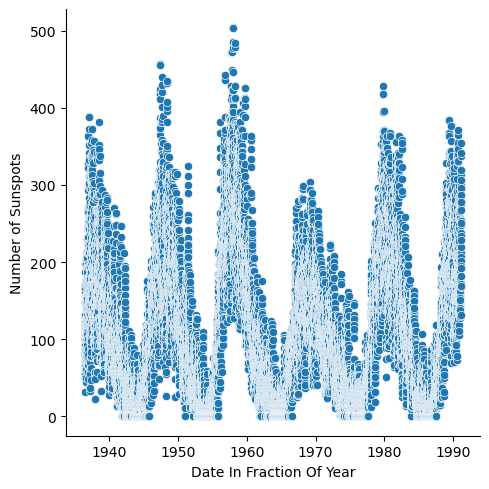

In [29]:
x = 2
numberOfDates = 20000
sns.relplot(data = df[20000*x:20000*(x+1)], x = 'Date In Fraction Of Year', y = 'Number of Sunspots') 


,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
72136,2015,7,3,2015.503,88.0,6.2,33,1
72137,2015,7,4,2015.505,99.0,6.6,33,1
72138,2015,7,5,2015.508,109.0,5.2,27,1
72139,2015,7,6,2015.511,97.0,8.1,48,1
72140,2015,7,7,2015.514,112.0,11.0,41,1
...,...,...,...,...,...,...,...,...
72930,2017,9,4,2017.675,112.0,6.8,33,1
72931,2017,9,5,2017.678,119.0,11.8,35,1
72932,2017,9,6,2017.681,100.0,9.1,31,1
72933,2017,9,7,2017.684,97.0,8.5,32,1


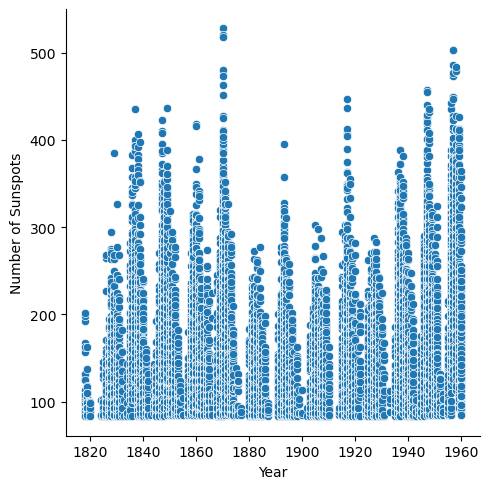

In [17]:
numerDeviation = 0
x = 0
df2 = df[df['Number of Sunspots']>(df['Number of Sunspots'].mean()+numerDeviation*df['Number of Sunspots'].std())]
sns.relplot(data = df2[20000*x:20000*(x+1)], x = 'Year', y = 'Number of Sunspots') 
df2.tail(70)

Int64Index([1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827,
            ...
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Year', length=202)


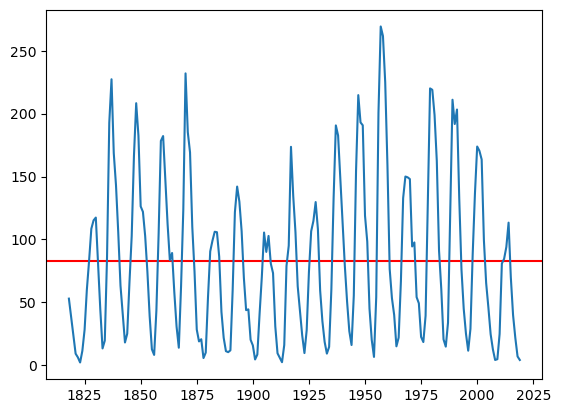

In [18]:
years = df['Year'].unique()
df3 = df.groupby('Year').mean()
df3.head(10)
print(df3.index)
plt.axhline(y=df['Number of Sunspots'].mean() , color='r', linestyle='-')
plt.plot(df3.index, df3['Number of Sunspots'])

En el siguiente analisis se agarrara el valor promedio y se mirara cada cuanto pasa por la linea roja subiendo, con esto conseguiremos un estimativo de su periodo

In [19]:
df4 = df3[df3['Number of Sunspots']>(df['Number of Sunspots'].mean())]
list1 = []
last = 0
for i in df4.index:
    if(last+1 != i):
        last = i
        list1.append(i)
    else:
        last += 1
list2 = []
for i in range(len(list1)-1):
    list2.append(list1[i+1]-list1[i])
print("La media es", np.mean(list2))
print("La media estandar es",np.std(list2))

La media es 10.882352941176471
La media estandar es 1.3232025740237636


Según el analisis anterior tenemos que los sunspots se repiten cada $10.76 \pm 1.16$

Realizamos la fft, teniendo en cuenta que la resolucion de frecuencia vendria dada por.
$$ f_{res} = \dfrac{\text{samplingRate}}{\text{\#Ndatos}}$$ 
Además se realiza otro estudio para encontrar otro pico más alto

The period is approximately 10.631578947368421 years.
Frequency resolution is approximately 0.0049504950495049506 cycles/year.
Uncertainty in period is approximately ± 1.1222222222222236


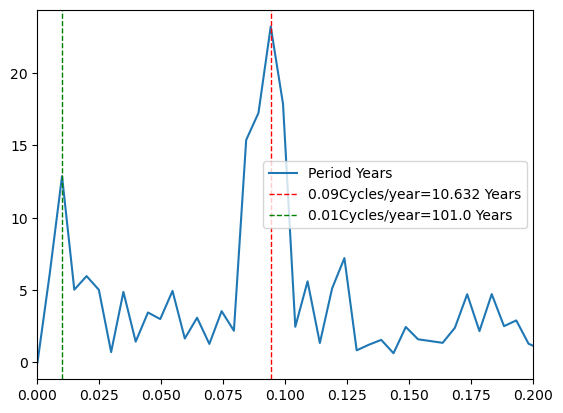

In [20]:
# Apply fft
data = df3['Number of Sunspots']
n = len(data)
# remove offset
data = data - data.mean()
# Perform FFT
sampling_rate = 1  # 1 sample/year
frequency_resolution = sampling_rate / n
fft = np.fft.fft(data) / n
fft = fft[range(n//2)]
maxvalueindex = np.argmax(abs(fft))
freq = maxvalueindex * frequency_resolution
fft2 = fft.copy()
fft2[maxvalueindex] = 0
maxvalueindex2 = np.argmax(abs(fft2))
fft2[maxvalueindex2] = 0
maxvalueindex2 = np.argmax(abs(fft2))
fft2[maxvalueindex2] = 0
maxvalueindex2 = np.argmax(abs(fft2))
fft2[maxvalueindex2] = 0
maxvalueindex2 = np.argmax(abs(fft2))
freq2 = maxvalueindex2 * frequency_resolution
period = 1 /freq
period2 = 1/(frequency_resolution*maxvalueindex2)
frecList = [(i*frequency_resolution) for i in range(0,len(fft))]
plt.plot(frecList,np.abs(fft), label = 'Period Years')
# Function add a legend  
plt.axvline(x=freq, color = "red", linewidth = 1, linestyle = "dashed", label = "{}Cycles/year={} Years".format(np.round(freq,2),np.round(1/freq,3)))
plt.axvline(x=freq2, color = "green", linewidth = 1, linestyle = "dashed", label = "{}Cycles/year={} Years".format(np.round(freq2,2),np.round(1/freq2,3)))
plt.legend()
plt.xlim([0,0.2])
print(f"The period is approximately {period} years.")
print(f"Frequency resolution is approximately {frequency_resolution} cycles/year.")
print(f"Uncertainty in period is approximately ± {1/(freq - frequency_resolution)-1/(freq + frequency_resolution)}")


Según esta forma obtenemos el siguiente resultado $10.63 \pm 1.12$

In [21]:
x = [1,1,1]
h = [0.5,2,0]
np.convolve(x,h)

array([0.5, 2.5, 2.5, 2. , 0. ])